In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(vegan)
library(plyr); library(dplyr)
library(RColorBrewer)
library(stats)
library(reshape2)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: iterators

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: permute

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/

## Running Pairwise Comparisons on Filtered fasta file

In [20]:
! head data/SIP_Bulk_otusn.pick.fasta

>OTU.1
TTACAGAGTCGCAATACTCCGTAAACCATTGTGAACGTTACCTAACCGTTGCTTCGGCGGGCGGCGCCCGGGCCCTCGCGGCCCGCGGCGCCCCCCGGCCCCTGCGGGCGCCCGCCGGAGGTAGACCAAACTCTTGAATTACATGGCCTCTCTGAGTCTTCTGTACTGAATAAGTCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.2
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCTTCAAACCGTTGCTTCGGCGGGCGGCCCGGGTCCGCCCGGTGCCCCCTGGCCCCCTAGCGGGGCGCCCGCCGGAGGAAACCCAACTCTTGATTATTATGGCCTCTCTGAGTCTTCTGTACTGAATAAGTCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.3
TTACTGAGTACTACACTCTCTACCCTTTGTGAACTATTATACCTGTTGCTTCGGCGGCGCCCGCGAGGGTGCCCGCCGGTCTCATCAGAATCTCTGTTTTCGAACCCGACGATACTTCTGAGTGTTCTTAGCGAACTGTCAAAACTTTTAACAACGGATCTCTTGGCTCCAGC
>OTU.4
TTACAGAGTCGCAACACTCCGTAAACCATTGTGAACGTTACCTTAACCGTTGCTTCGGCGGGCGGCGCCCGGGCCTCACCGCCCGCGGCGCCCCCCGGCCCCCCGTGGGCGCCCGCCGGAGGTACACCAAACTCTTGCATTGTATGGCCTCTCTGAGTATTCTGTACTGAATAAGTCAAAACTTTCAACAACGGATCTCTTGGTTCTGGC
>OTU.5
TTACAGAGTTGCAAAACTCCCTAAACCATTGTGAACGTTACCAAAACCGTTGCTTCGGCGGGCGGCCCGGGTCCTTCCCGGCGCCCCCCGGCCCTCGCGGGCGCCCGCCGGAGGTAAACCAAACTATTGCATTAATGGCCTCTCTGAGTCTTCTGTACTGAATA

In [22]:
#! grep -c ">" data/otusn.pick.fasta
! grep -c ">" data/SIP_Bulk_otusn.pick.fasta

1905


In [26]:
%%bash
ionice -c2 -n3 \
mothur "#pairwise.seqs(fasta=data/SIP_Bulk_otusn.pick.fasta, calc=onegap, countends=false, \
processors=10, output=square)" #> /dev/null

#mothur "#pairwise.seqs(fasta=data/otusn.pick.fasta, calc=onegap, countends=false, \
#processors=10, output=square)" #> /dev/null







mothur v.1.39.5
Last updated: 3/20/2017

by
Patrick D. Schloss

Department of Microbiology & Immunology
University of Michigan
http://www.mothur.org

When using, please cite:
Schloss, P.D., et al., Introducing mothur: Open-source, platform-independent, community-supported software for describing and comparing microbial communities. Appl Environ Microbiol, 2009. 75(23):7537-41.

Distributed under the GNU General Public License

Type 'help()' for information on the commands that are available

For questions and analysis support, please visit our forum at https://www.mothur.org/forum

Type 'quit()' to exit program



mothur > pairwise.seqs(fasta=data/SIP_Bulk_otusn.pick.fasta, calc=onegap, countends=false, processors=10, output=square)

Using 10 processors.
Processing sequences from data/SIP_Bulk_otusn.pick.fasta ...
200	10
300	98
380	171
400	20
500	113
570	178
800	36
900	130
951	178
1000	45
1100	139
1142	179
1400	65
1500	157
1523	179
1800	82
1900	175
1904	179
1600	71
1700	168
1713	

In [64]:
!tail data/SIP_Bulk_otusn.pick.square.dist | cut -c1-80

OTU.38723 	0.2427	0.2206	0.3194	0.2244	0.2327	0.4138	0.2146	0.3367	0.2165	0.3037
OTU.38728 	0.4	0.4	0.3978	0.4	0.4	0.4398	0.4	0.4062	0.3955	0.4057	0.3871	0.4498	
OTU.38774 	0.435	0.4286	0.4545	0.4286	0.4286	0.4286	0.4286	0.4286	0.4286	0.4545	
OTU.38907 	0.4167	0.4	0.3931	0.422	0.4085	0.3514	0.4286	0.3968	0.3968	0.3778	0.4
OTU.38945 	0.4265	0.32	0.4088	0.32	0.4203	0.1256	0.32	0.3682	0.4115	0.4	0.1598	0
OTU.38981 	0.4286	0.4211	0.4157	0.4474	0.4342	0.3937	0.4342	0.4188	0.4012	0.3889
OTU.39072 	0.3459	0.2935	0.3667	0.301	0.3065	0.4045	0.295	0.3757	0.04396	0.326	0
OTU.39094 	0.4359	0.452	0.425	0.4494	0.4489	0.3593	0.4494	0.4171	0.4104	0.4211	0
OTU.39172 	0.25	0.25	0.3065	0.2476	0.2427	0.4138	0.2548	0.3535	0.2487	0.3105	0.4
OTU.39204 	0.4028	0.3901	0.4372	0.4189	0.4018	0.4158	0.4126	0.4118	0.4021	0.418	


In [65]:
! grep -c "OTU" data/SIP_Bulk_otusn.pick.square.dist

1905


## Running t-SNE analysis on pairwise distance matrix

In [29]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from math import log

In [30]:
%matplotlib inline

In [66]:
dist_lines = open("data/SIP_Bulk_otusn.pick.square.dist").readlines()
def line2array(line):
    line = line.rstrip()
    return np.array(map(float, line.split("\t")[1:]))
distmat = np.vstack([line2array(line) for line in dist_lines[1:]])

In [67]:
def getOTU(line):
    line = line.rstrip()
    return np.array(line.split("\t")[0:1])
OTU= np.vstack(getOTU(line) for line in dist_lines[1:])

In [68]:
print OTU

[['OTU.1     ']
 ['OTU.2     ']
 ['OTU.3     ']
 ..., 
 ['OTU.39094 ']
 ['OTU.39172 ']
 ['OTU.39204 ']]


In [69]:
print distmat

[[ 0.      0.108   0.392  ...,  0.4627  0.25    0.4028]
 [ 0.108   0.      0.3077 ...,  0.452   0.25    0.3901]
 [ 0.392   0.3077  0.     ...,  0.4211  0.3065  0.4372]
 ..., 
 [ 0.4359  0.452   0.425  ...,  0.      0.4091  0.3807]
 [ 0.25    0.25    0.3065 ...,  0.4091  0.      0.3791]
 [ 0.4028  0.3901  0.4372 ...,  0.3807  0.3791  0.    ]]


In [70]:
def corr(a):
    if (a >= 0.75): return a
    else: return (-3/4*(log(1-(4/3*a))))

In [71]:
vecfunc = np.vectorize(corr)
result=vecfunc(distmat)

In [72]:
print result

[[-0.          0.11428915  0.4975804  ...,  0.62119868  0.28768207
   0.51550321]
 [ 0.11428915 -0.          0.36773589 ...,  0.60147999  0.28768207
   0.49446027]
 [ 0.4975804   0.36773589 -0.         ...,  0.54662553  0.36600404
   0.57483095]
 ..., 
 [ 0.57252374  0.60147999  0.55338524 ..., -0.          0.52610848
   0.47916547]
 [ 0.28768207  0.28768207  0.36600404 ...,  0.52610848 -0.          0.47658524]
 [ 0.51550321  0.49446027  0.57483095 ...,  0.47916547  0.47658524 -0.        ]]


In [73]:
model = TSNE(n_components=2, random_state=0)
tsne_coords = model.fit_transform(result) 

In [74]:
tsne_coords

array([[  9.79920838,  -7.39635964],
       [  8.87510338,  -8.57920006],
       [ 14.99202757,  -6.07888596],
       ..., 
       [  5.70423556,  17.75283838],
       [ -9.4514575 , -15.70410245],
       [  2.15598212,  10.86670118]])

In [75]:
combo = np.concatenate((tsne_coords, OTU), axis = 1)

In [76]:
combo

array([['9.79920837525', '-7.39635963651', 'OTU.1     '],
       ['8.87510337812', '-8.57920006011', 'OTU.2     '],
       ['14.9920275724', '-6.07888596498', 'OTU.3     '],
       ..., 
       ['5.70423556037', '17.7528383788', 'OTU.39094 '],
       ['-9.45145749734', '-15.7041024494', 'OTU.39172 '],
       ['2.15598212224', '10.8667011837', 'OTU.39204 ']], 
      dtype='|S32')

## Visualizing t-SNE coordinates

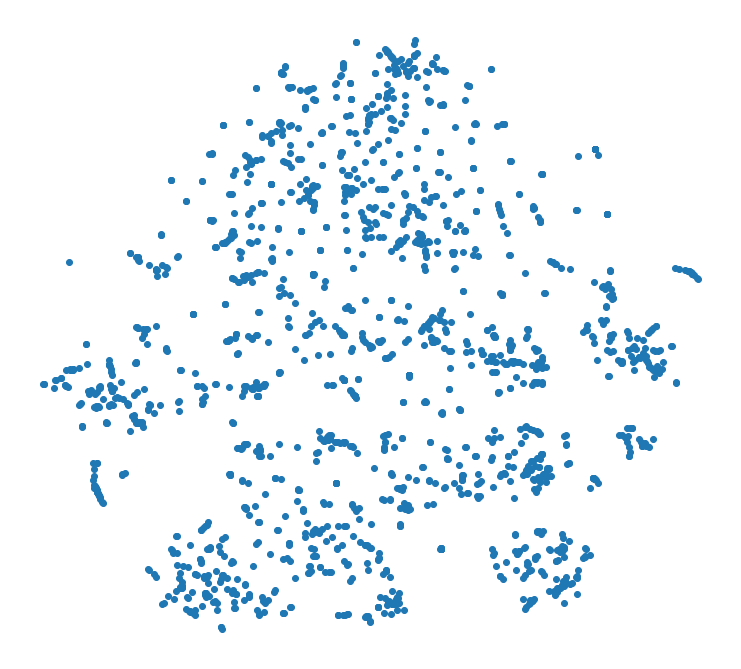

In [77]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(combo[:, 0], combo[:, 1])

## Importing python variables of t-SNE coordinates into R

In [78]:
%Rpush combo

In [79]:
%%R
colnames(combo) = c("tsne_1", "tsne_2", "OTU")

In [80]:
%%R
combo = as.data.frame(combo)

In [81]:
%%R
head(combo)

          tsne_1         tsne_2        OTU
1  9.79920837525 -7.39635963651 OTU.1     
2  8.87510337812 -8.57920006011 OTU.2     
3  14.9920275724 -6.07888596498 OTU.3     
4  9.55075736805 -5.68477547825 OTU.4     
5  9.57085172583 -9.16358503836 OTU.5     
6 -15.7173202892  7.94062097392 OTU.6     


In [82]:
%%R
combo$OTU = gsub(" ", "", combo$OTU, fixed = TRUE)

In [83]:
%%R
head(combo)

          tsne_1         tsne_2   OTU
1  9.79920837525 -7.39635963651 OTU.1
2  8.87510337812 -8.57920006011 OTU.2
3  14.9920275724 -6.07888596498 OTU.3
4  9.55075736805 -5.68477547825 OTU.4
5  9.57085172583 -9.16358503836 OTU.5
6 -15.7173202892  7.94062097392 OTU.6


## Creating csv with t-SNE information

In [84]:
%%R
write.table(combo, "data/tSNE.csv", row.names = FALSE, sep = ",")

# Start notebook here if just visualizing t-SNE

In [3]:
%%R
combo = read.csv("data/tSNE.csv")

## Adding Metadata to t-SNE coordinates

In [4]:
%%R
sample.md = read.table("data/Metadata_fungi.txt", 
                comment.char = "",
                header = TRUE,
                colClasses = c("Density" = "numeric"))
rownames(sample.md) = as.character(sample.md[, 1])

sample.md = sample_data(sample.md)

In [5]:
%%R
physeq = import_biom("data/SIP_Bulk_otu_table_wtax.biom")
print(physeq)
sample.data = import_qiime_sample_data("data/Metadata_fungi.txt")
physeq = merge_phyloseq(physeq,sample.data)
print(physeq)
physeq.md = sample_data(physeq)
physeq.fungi = prune_samples((physeq.md$Treatment %in% c("12CCPS","13CCPS"))& 
                             (physeq.md$SampleID != c("D312.6")),  physeq)
physeq.fungi.prune = prune_samples(sample_sums(physeq.fungi) > 5360, physeq.fungi)
print (physeq.fungi.prune)
physeq.fungi.snorm = transform_sample_counts(physeq.fungi.prune, function(x) x/sum(x))
#physeq.fungi.thresh = filter_taxa(physeq.fungi.snorm, function(x) sum(x > 0) / length(x) > (0.25), TRUE)
#physeq.fungi.thresh.min = filter_taxa(physeq.fungi.thresh, function(x) sum(x) > 5000, TRUE)
#physeq.fungi.thresh = filter_taxa(physeq.SIP.snorm, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)
#print(physeq.fungi.thresh)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1905 taxa and 181 samples ]
tax_table()   Taxonomy Table:    [ 1905 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1905 taxa and 181 samples ]
sample_data() Sample Data:       [ 181 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 1905 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1905 taxa and 170 samples ]
sample_data() Sample Data:       [ 170 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 1905 taxa by 7 taxonomic ranks ]


In [6]:
%%R
mdf= tbl_df(psmelt(physeq.fungi.prune))

In [7]:
%%R
d = left_join(mdf, combo)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Joining, by = "OTU"

  warnings.warn(x, RRuntimeWarning)


In [8]:
%%R
length(unique(d$OTU))

[1] 1905


In [9]:
%%R
d$Rank2 = gsub("p__", "", d$Rank2)
d$Rank3 = gsub("c__", "", d$Rank3)
d$Rank4 = gsub("o__", "", d$Rank4)

In [10]:
%%R
d_sub = select(d, OTU, Sample, Day, tsne_1, tsne_2, Density, Rank1, Rank2, Rank3, Treatment)

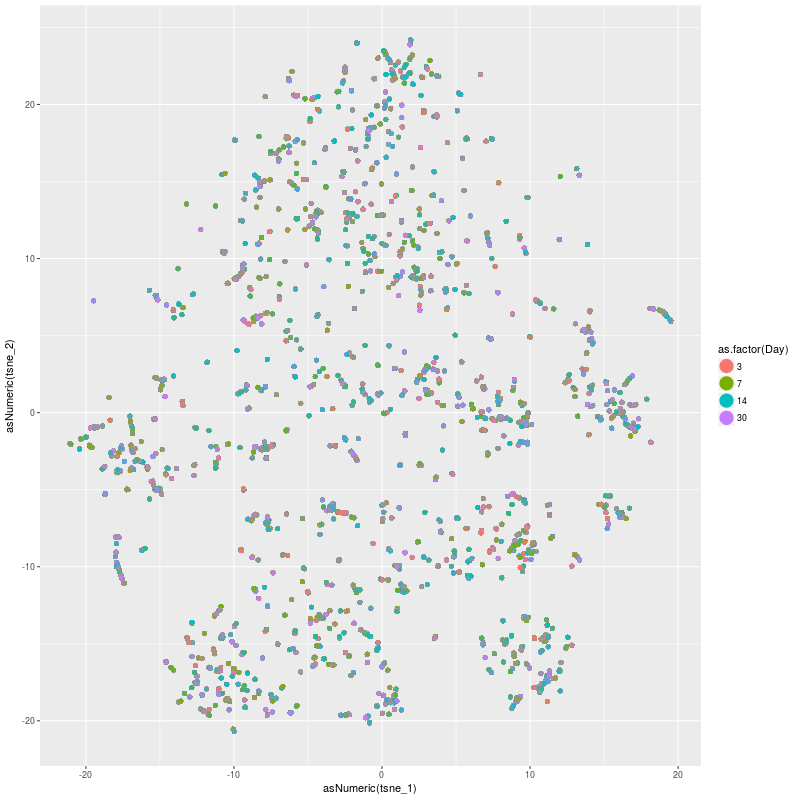

In [11]:
%%R -w 800 -h 800

asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d_sub, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = as.factor(Day), color = as.factor(Day), alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))


p      

In [12]:
%%R
l2fc = read.csv("data/l2fc_UNITE_MW.csv", header = TRUE, sep = ",")

In [13]:
%%R
length(unique(l2fc$OTU))

[1] 560


In [14]:
%%R
d2 = left_join(combo, l2fc)

In [15]:
%%R
test = filter(l2fc, !(OTU %in% combo$OTU))
length(unique(test$OTU))

[1] 0


In [16]:
%%R
filter(combo, OTU == 'OTU.30467')

     tsne_1    tsne_2       OTU
1 0.8744059 -18.70911 OTU.30467


In [17]:
%%R
test$OTU

factor(0)
560 Levels: OTU.1 OTU.10 OTU.1000 OTU.1002 OTU.1003 OTU.1004 ... OTU.9995


In [18]:
%%R
length(unique(combo$OTU))

[1] 1905


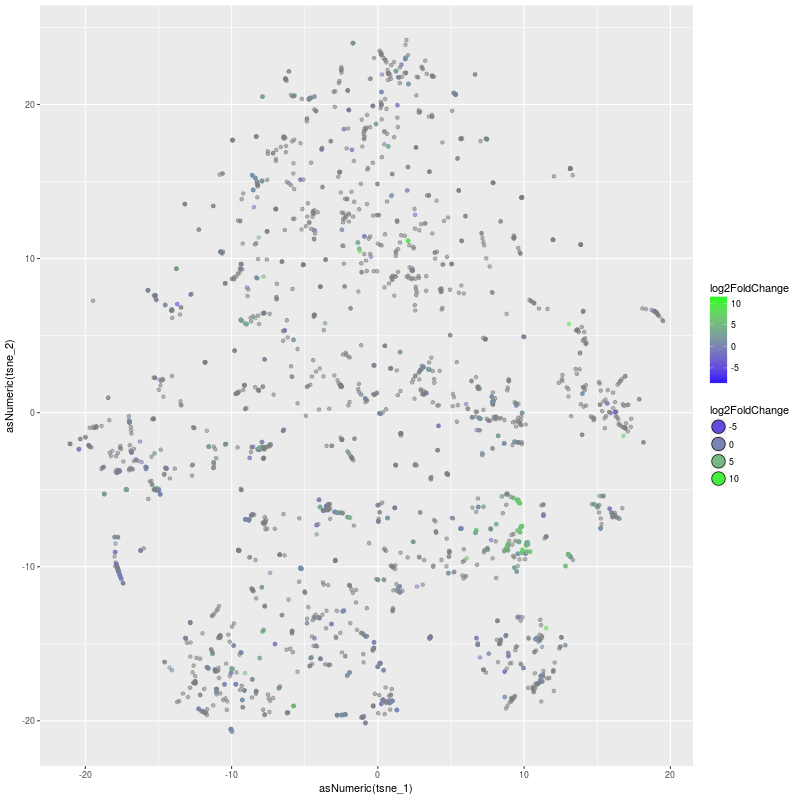

In [19]:
%%R -w 800 -h 800

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = log2FoldChange, color = log2FoldChange, alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density")+
    scale_fill_gradient(low="blue",high="green") + scale_colour_gradient(low="blue",high="green") 


p     

In [20]:
%%R
head(d2)
d2$logp = -log10(d2$padj)

In [21]:
%%R
d2$Resp_status[d2$padj > 0.10] = "Non-responder"
d2$Resp_status[d2$padj <= 0.10] = "Responder"
d2$Resp_status[is.na(d2$padj)] = "Non-responder"

In [22]:
%%R
filter(l2fc, padj <= 0.10) %>%   summarize(n_incorp_OTUs = OTU %>% unique %>% length) 


  n_incorp_OTUs
1           193


In [23]:
%%R
filter(d2, padj <= 0.10) %>%   summarize(n_incorp_OTUs = OTU %>% unique %>% length) 


  n_incorp_OTUs
1           193


In [24]:
%%R
d2 %>%   summarize(n_incorp_OTUs = OTU %>% unique %>% length) 

  n_incorp_OTUs
1          1905


In [25]:
%%R
length((l2fc$OTU))

[1] 1521


## Visualizing t-SNE Coordinates with Metadata painted on

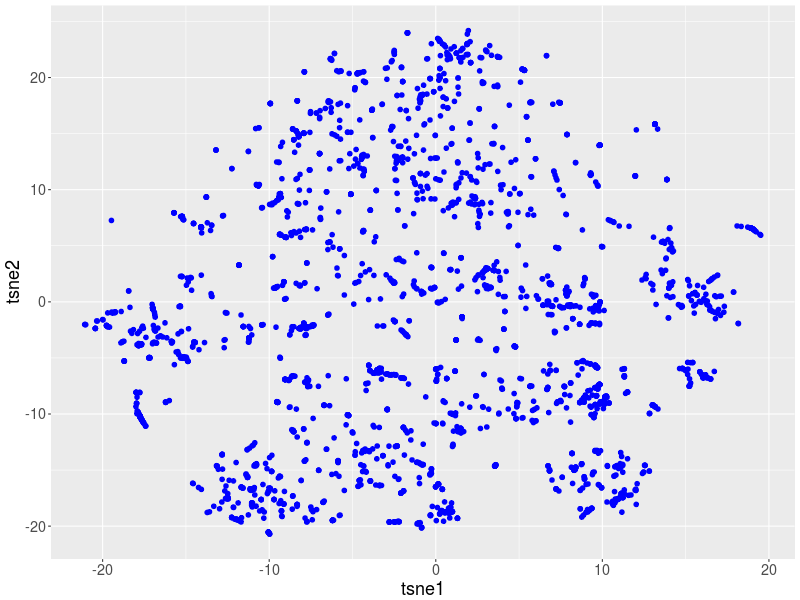

In [26]:
%%R -w 800 -h 600

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(fill = "blue", color = "blue", size = 2, pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6)))  + 
    #scale_colour_gradient(limits = c(0, 1), low="red", high="blue", name = "Adjusted p-value") +
    guides(color=FALSE) + theme(text = element_text(size=18)) 


p = p + xlab("tsne1") + ylab("tsne2")


p   

In [27]:
%%R
ggsave("data/figs/tnseFig_nolabels.png", p, height = 7, width = 7)

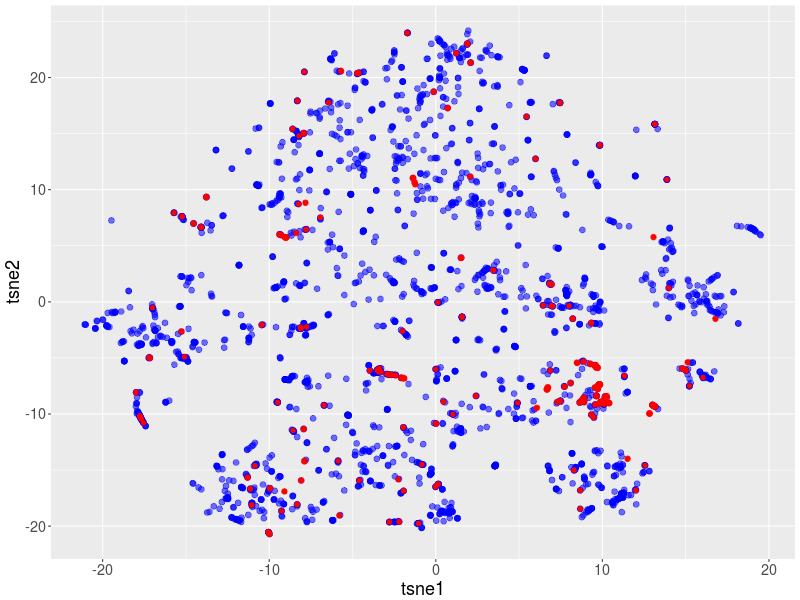

In [28]:
%%R -w 800 -h 600

my_palette <- c("blue", "red", "grey")


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = Resp_status, color = Resp_status, alpha = 0.85), size = 2.5, pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=5))) +
    scale_shape_discrete(name = "Responder Status") + 
    scale_colour_manual(values = my_palette) +
    scale_fill_manual(values = my_palette, name = "Responder Status")+
    guides(color=FALSE) + theme(text = element_text(size=18)) 

p = p + geom_point(data = subset(d2, padj <= 0.10), shape = 20, size = 3, color = "red")

p = p + theme(legend.position ="bottom")

p = p + xlab("tsne1") + ylab("tsne2")

p = p + guides(fill = FALSE)


p     

In [29]:
%%R
ggsave("data/figs/tnseFig_resp.png", p, height = 8, width = 8)

In [30]:
%%R
na = filter(d2, is.na(Rank3))
rest = filter(d2, !is.na(Rank3))
na$group = "Unclassified"
rest$group = rest$Rank3
g = rbind(na, rest)

In [31]:
%%R
head(g)

     tsne_1    tsne_2    OTU Day log2FoldChange            p         padj
1  9.636409 -8.392377  OTU.7   7      1.3005906 3.150087e-04 4.745674e-03
2  9.636409 -8.392377  OTU.7  14      4.8415520 7.204844e-23 6.052069e-21
3  9.636409 -8.392377  OTU.7  30      0.7496056 2.279720e-01 8.613261e-01
4  9.636409 -8.392377  OTU.7   3      3.4498532 9.388700e-37 7.041525e-34
5 -2.560815  1.808797 OTU.17   7      0.4423803 2.071487e-01 8.112315e-01
6 -2.560815  1.808797 OTU.17  14     -0.1616244 7.949879e-01 1.000000e+00
     Rank1         Rank2 Rank3 Rank4 Rank5 Rank6 Rank7 density_min density_max
1 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.72        1.75
2 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.74        1.77
3 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.70        1.73
4 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.72        1.75
5 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.70        1.73
6 k__Fun

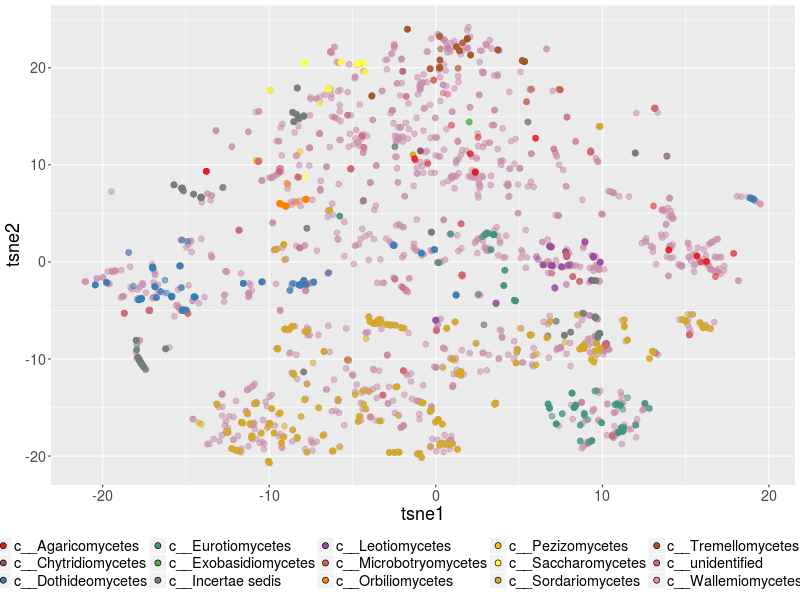

In [32]:
%%R -w 800 -h 600

#my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p2 = ggplot(g, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))
#p = p + geom_point(data = subset(d2, padj <= 0.10), shape = 20, size = 6)
p2 = p2 + geom_point(aes(fill = group, color = group, alpha = 0.85), pch = 21, size = 2.5) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=5))) +
    guides(colour=FALSE)

colourCount = length(unique(g$group)) + 1
getPalette = colorRampPalette(brewer.pal(10, "Set1"))
p2 = p2 + scale_color_manual(values = getPalette(colourCount))
p2 = p2 + scale_fill_manual(values = getPalette(colourCount), name = "Class")+ theme(text = element_text(size=18)) 

#p = p  + geom_point(data = subset(d2, Rank3 %in% c('unclassified', 'unidentified')), color = "black", size = 2)
p2 = p2 + theme(legend.position= "bottom") + guides(fill=guide_legend(ncol=6))
#p2 = p2 + guides(fill = FALSE)




p2 = p2 + xlab("tsne1") + ylab("tsne2") +  guides(color=FALSE) 


p2   

In [33]:
%%R
tiff("data/figs/tnse.tax.tiff", res = 75, )
grid.arrange(p, p2, ncol=2)
dev.off()

png 
  2 


In [34]:
%%R
poss_Sords = filter(g, padj <= 0.10, is.na(Rank3)) %>% arrange(tsne_2, tsne_1)
length(unique(poss_Sords$OTU))

[1] 21


In [35]:
%%R
head(g)

     tsne_1    tsne_2    OTU Day log2FoldChange            p         padj
1  9.636409 -8.392377  OTU.7   7      1.3005906 3.150087e-04 4.745674e-03
2  9.636409 -8.392377  OTU.7  14      4.8415520 7.204844e-23 6.052069e-21
3  9.636409 -8.392377  OTU.7  30      0.7496056 2.279720e-01 8.613261e-01
4  9.636409 -8.392377  OTU.7   3      3.4498532 9.388700e-37 7.041525e-34
5 -2.560815  1.808797 OTU.17   7      0.4423803 2.071487e-01 8.112315e-01
6 -2.560815  1.808797 OTU.17  14     -0.1616244 7.949879e-01 1.000000e+00
     Rank1         Rank2 Rank3 Rank4 Rank5 Rank6 Rank7 density_min density_max
1 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.72        1.75
2 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.74        1.77
3 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.70        1.73
4 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.72        1.75
5 k__Fungi p__Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.70        1.73
6 k__Fun

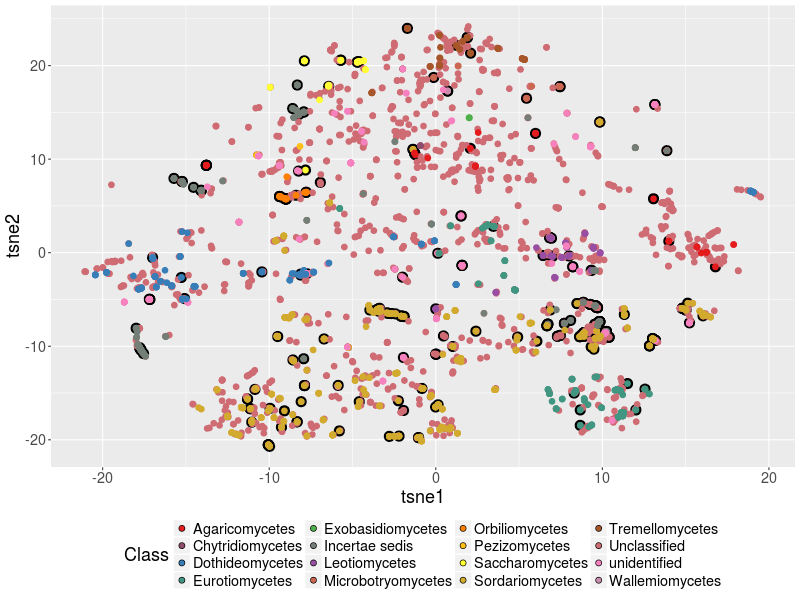

In [36]:
%%R -w 800 -h 600

#my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)

g$Rank2 = gsub("p__", "", g$Rank2)
g$Rank3 = gsub("c__", "", g$Rank3)
g$Rank4 = gsub("o__", "", g$Rank4)
g$group = gsub("c__", "", g$group)

asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(g, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))

p = p + geom_point(data = subset(g, padj <= 0.10), shape = 20, size = 7)


p = p + geom_point(aes(fill = group, color = group), pch = 21, size = 2.5) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_gradient(limits = c(0, 1), low="blue",high="green") + 
    #scale_colour_gradient(limits = c(0, 1), low="blue", high="green", name = "adjusted p-value") +
    guides(colour=FALSE)


colourCount = length(unique(d2$Rank3)) + 1
getPalette = colorRampPalette(brewer.pal(10, "Set1"))
p = p + scale_color_manual(values = getPalette(colourCount))
p = p + scale_fill_manual(values = getPalette(colourCount), name = "Class")+ theme(text = element_text(size=18)) 

#p = p  + geom_point(data = subset(d2, Rank3 %in% c('unclassified', 'unidentified')), color = "black", size = 2)


p = p + xlab("tsne1") + ylab("tsne2") +  guides(color=FALSE) 
p = p + theme(legend.position= "bottom") + guides(fill=guide_legend(ncol=4))# + stat_ellipse(data = poss_Sords)



p     

In [37]:
%%R
ggsave("data/figs/tnseFig_resp.png", p, height = 8, width = 10)

In [38]:
%%R
g2 = g %>%
       mutate(status = ifelse(group == "Unclassified" | group == "unidentified" | group == "Incertae sedis", 'unk',
                              'known'))

In [39]:
%%R
length(unique(g$OTU))

[1] 1905


In [40]:
%%R
filter(g2, status == 'unk' & padj <=0.10) %>% select(OTU, Rank3, status) %>% summarize(n_incorp_OTUs = OTU %>% unique %>% length)


  n_incorp_OTUs
1            73


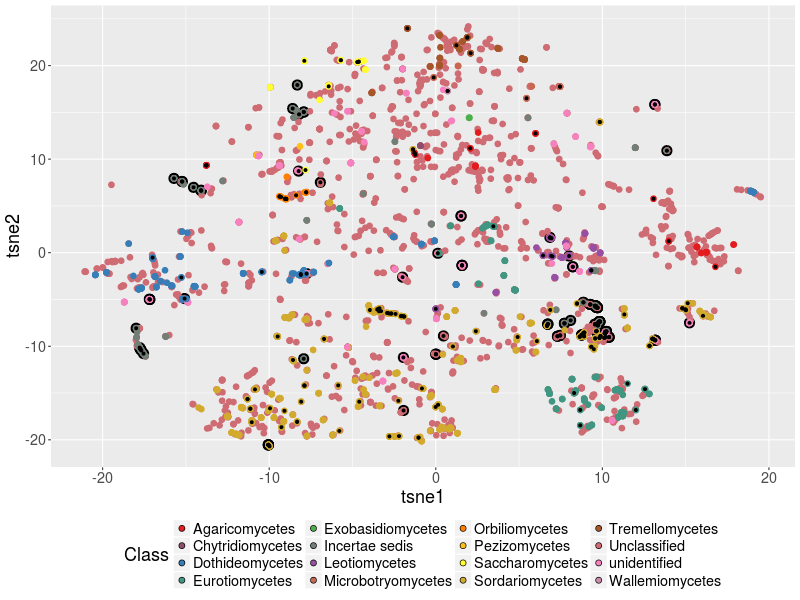

In [41]:
%%R -w 800 -h 600

#my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)

g$Rank2 = gsub("p__", "", g$Rank2)
g$Rank3 = gsub("c__", "", g$Rank3)
g$Rank4 = gsub("o__", "", g$Rank4)
g$group = gsub("c__", "", g$group)

asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(g2, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))


p = p + geom_point(data = filter(g2, status == 'unk' & padj <=0.10), shape = 20, size = 7, color = "black")


p = p + geom_point(aes(fill = group, color = group), pch = 21, size = 2.5) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_gradient(limits = c(0, 1), low="blue",high="green") + 
    #scale_colour_gradient(limits = c(0, 1), low="blue", high="green", name = "adjusted p-value") +
    guides(colour=FALSE)

p = p + geom_point(data = subset(g, padj <= 0.10), shape = 20, size = 2)


colourCount = length(unique(d2$Rank3)) + 1
getPalette = colorRampPalette(brewer.pal(10, "Set1"))
p = p + scale_color_manual(values = getPalette(colourCount))
p = p + scale_fill_manual(values = getPalette(colourCount), name = "Class")+ theme(text = element_text(size=18)) 

#p = p  + geom_point(data = subset(d2, Rank3 %in% c('unclassified', 'unidentified')), color = "black", size = 2)


p = p + xlab("tsne1") + ylab("tsne2") +  guides(color=FALSE) 
p = p + theme(legend.position= "bottom") + guides(fill=guide_legend(ncol=4))# + stat_ellipse(data = poss_Sords)




p     

In [42]:
%%R
head(g)

     tsne_1    tsne_2    OTU Day log2FoldChange            p         padj
1  9.636409 -8.392377  OTU.7   7      1.3005906 3.150087e-04 4.745674e-03
2  9.636409 -8.392377  OTU.7  14      4.8415520 7.204844e-23 6.052069e-21
3  9.636409 -8.392377  OTU.7  30      0.7496056 2.279720e-01 8.613261e-01
4  9.636409 -8.392377  OTU.7   3      3.4498532 9.388700e-37 7.041525e-34
5 -2.560815  1.808797 OTU.17   7      0.4423803 2.071487e-01 8.112315e-01
6 -2.560815  1.808797 OTU.17  14     -0.1616244 7.949879e-01 1.000000e+00
     Rank1      Rank2 Rank3 Rank4 Rank5 Rank6 Rank7 density_min density_max
1 k__Fungi Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.72        1.75
2 k__Fungi Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.74        1.77
3 k__Fungi Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.70        1.73
4 k__Fungi Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.72        1.75
5 k__Fungi Ascomycota  <NA>  <NA>  <NA>  <NA>  <NA>        1.70        1.73
6 k__Fungi Ascomycota  <NA

In [43]:
%%R
unk = g %>% 
        filter(Rank3 %in% c('unidentified', 'Incertae sedis')|is.na(Rank3)) %>% filter(padj <=0.10) %>%
        select(tsne_1, tsne_2, OTU) %>% unique() 
                                                    

In [44]:
%%R
df.known = g %>%  
  filter(!(Rank3 %in% c('unidentified', 'Incertae sedis'))) %>%
  filter(!(is.na(Rank3))) %>%
  filter(padj<0.10) %>% 
  select(tsne_1, tsne_2, OTU, Rank3) %>% unique() 

In [45]:
%%R
m = expand.grid(OTU_l = unique(unk$OTU), OTU_c = unique(df.known$OTU))
head(m)

    OTU_l OTU_c
1   OTU.7 OTU.2
2  OTU.50 OTU.2
3 OTU.108 OTU.2
4 OTU.297 OTU.2
5 OTU.534 OTU.2
6 OTU.595 OTU.2


In [46]:
%%R
dist(rbind(c(1,2), c(2,3)))#,2,3,4)

rbind(c(1,2), c(2,3))

     [,1] [,2]
[1,]    1    2
[2,]    2    3


In [47]:
%%R
test_dist = function(unk, known, OTU_l, OTU_c){
    #filtering to one known and one unknown OTU
    known_filt = filter(known, OTU == OTU_c)
    unk_filt = filter(unk, OTU == OTU_l)

    #creating df with coords
    coords = rbind(c(unk_filt$tsne_1, unk_filt$tsne_2), c(known_filt$tsne_1, known_filt$tsne_2))

    #calculating distance b/t known and unknown OTU coords
    d_tsne1 = dist(coords)
    
    #creating dataframe
    data.frame(OTU_l, as.numeric(d_tsne1), OTU_c, known_filt$Rank3)

}

#test = mdply(unk, test_dist, class = df.class, classlist = df.class$Rank3 )

test = tbl_df(mdply(m,
                    test_dist, 
                    .parallel = TRUE, 
                    unk = unk, 
                    known = df.known))

head(test)

#ddply(.data, .variables, .fun = NULL, ..., .progress = "none", .inform = FALSE, .drop = TRUE, .parallel = FALSE, .paropts = NULL)


# A tibble: 6 × 4
    OTU_l as.numeric.d_tsne1.  OTU_c known_filt.Rank3
   <fctr>               <dbl> <fctr>           <fctr>
1   OTU.7           0.7838937  OTU.2  Sordariomycetes
2  OTU.50          22.3884753  OTU.2  Sordariomycetes
3 OTU.108          13.6183830  OTU.2  Sordariomycetes
4 OTU.297           9.1506934  OTU.2  Sordariomycetes
5 OTU.534          24.2373919  OTU.2  Sordariomycetes
6 OTU.595           1.2976246  OTU.2  Sordariomycetes


In [48]:
%%R
test2 = test %>% group_by(OTU_l) %>% na.omit %>% 
          filter(as.numeric.d_tsne1. == min(as.numeric.d_tsne1.)) 

test2

Source: local data frame [73 x 4]
Groups: OTU_l [73]

      OTU_l as.numeric.d_tsne1.   OTU_c known_filt.Rank3
     <fctr>               <dbl>  <fctr>           <fctr>
1   OTU.673          0.99545586  OTU.98    Leotiomycetes
2   OTU.515          1.17797754 OTU.201    Leotiomycetes
3  OTU.6228          1.17982989 OTU.218  Sordariomycetes
4   OTU.297          1.30870216 OTU.222  Sordariomycetes
5  OTU.3716          1.25894765 OTU.222  Sordariomycetes
6   OTU.236          3.19287325 OTU.222  Sordariomycetes
7   OTU.202          3.79780566 OTU.234  Sordariomycetes
8   OTU.264          3.79793718 OTU.234  Sordariomycetes
9   OTU.391          5.06193670 OTU.234  Sordariomycetes
10  OTU.612          0.03845546 OTU.248    Leotiomycetes
# ... with 63 more rows


In [60]:
%%R
test3 = test2 %>% group_by(known_filt.Rank3) %>% summarise(cat = OTU_l %>% unique %>% length, 
                                                           mean_dist = mean(as.numeric.d_tsne1.),
                                                          max_dist = max(as.numeric.d_tsne1.)) 

test3

# A tibble: 7 × 4
  known_filt.Rank3   cat mean_dist max_dist
            <fctr> <int>     <dbl>    <dbl>
1  Sordariomycetes    43 1.4883661 7.991127
2   Orbiliomycetes     1 1.3630623 1.363062
3  Saccharomycetes     6 2.5398630 3.476189
4  Dothideomycetes     9 5.1908536 8.064658
5    Leotiomycetes     3 0.7372963 1.177978
6   Eurotiomycetes     4 3.9459504 4.577351
7   Agaricomycetes     7 2.5006126 2.731894


In [51]:
%%R
filter(test, OTU_l == 'OTU.108')

# A tibble: 120 × 4
     OTU_l as.numeric.d_tsne1.  OTU_c known_filt.Rank3
    <fctr>               <dbl> <fctr>           <fctr>
1  OTU.108           13.618383  OTU.2  Sordariomycetes
2  OTU.108           20.069685  OTU.3  Sordariomycetes
3  OTU.108           13.843613  OTU.5  Sordariomycetes
4  OTU.108           23.683451  OTU.8   Orbiliomycetes
5  OTU.108            3.039123 OTU.16  Sordariomycetes
6  OTU.108           37.377208 OTU.31  Saccharomycetes
7  OTU.108            6.502928 OTU.46  Sordariomycetes
8  OTU.108           13.164705 OTU.49  Sordariomycetes
9  OTU.108            9.201815 OTU.53  Sordariomycetes
10 OTU.108           10.931282 OTU.60  Sordariomycetes
# ... with 110 more rows


In [ ]:
%%R
ggsave("data/figs/tnseFig.jpg", p, height = 8, width =10 )

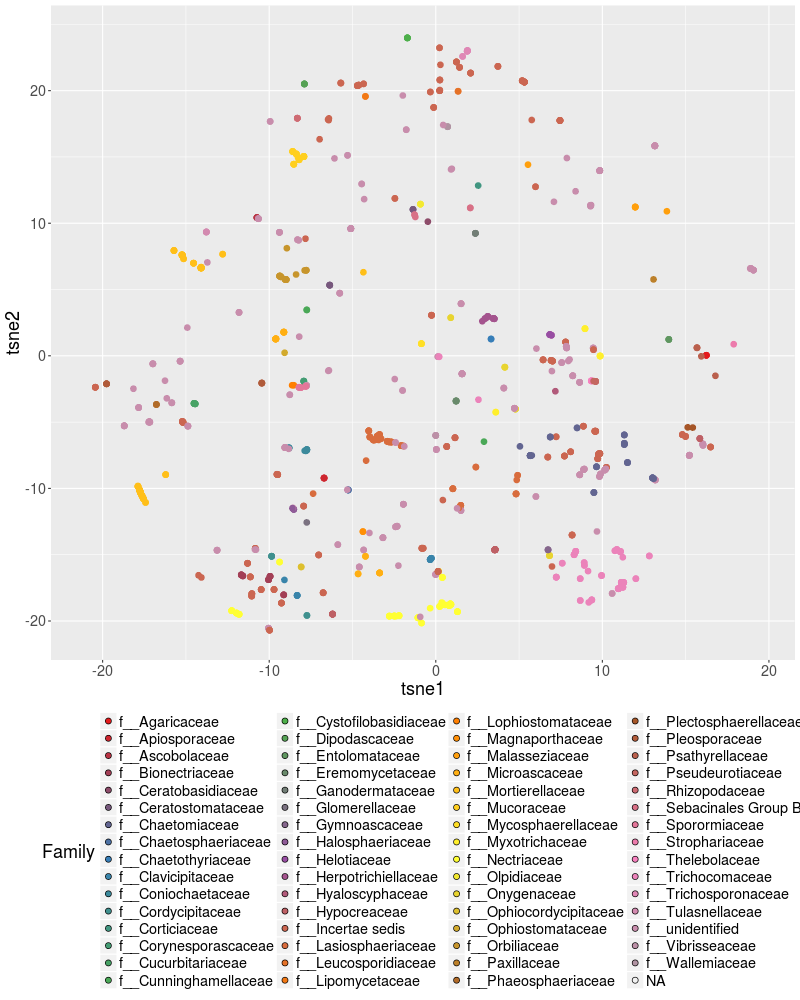

In [52]:
%%R -w 800 -h 1000

#my_palette <- colorRampPalette(c("red", "yellow", "green"))(n = 299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(g, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))
#p = p + geom_point(data = subset(d2, padj <= 0.10), shape = 20, size = 7)
p = p + geom_point(aes(fill = Rank5, color = Rank5), pch = 21, size = 2.5) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_gradient(limits = c(0, 1), low="blue",high="green") + 
    #scale_colour_gradient(limits = c(0, 1), low="blue", high="green", name = "adjusted p-value") +
    guides(colour=FALSE)

colourCount = length(unique(d2$Rank5)) + 1
getPalette = colorRampPalette(brewer.pal(10, "Set1"))
p = p + scale_color_manual(values = getPalette(colourCount))
p = p + scale_fill_manual(values = getPalette(colourCount), name = "Family")+ theme(text = element_text(size=18)) 

#p = p  + geom_point(data = subset(d2, Rank3 %in% c('unclassified', 'unidentified')), color = "black", size = 2)


p = p + xlab("tsne1") + ylab("tsne2") +  guides(color=FALSE) 
p = p + theme(legend.position= "bottom") + guides(fill=guide_legend(ncol=4))



p     

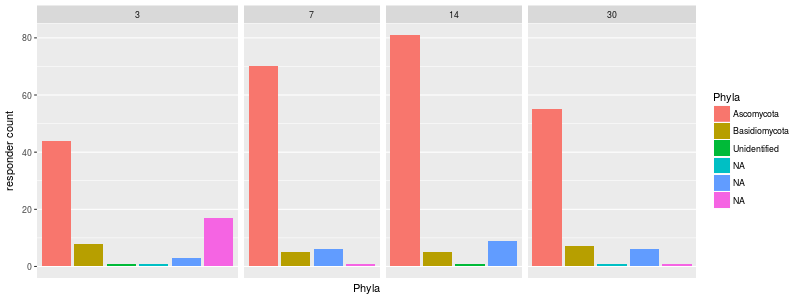

In [53]:
%%R -w 800 -h 300

dcounts = d2 %>%
          group_by(Day,Rank2) %>%
          summarize(responders = sum(padj<= 0.10)) 

dcounts = filter(dcounts, responders !=0)          
dcounts$Rank2[is.na(dcounts$Rank2)] = "p__unidentified"

p2 = ggplot(dcounts, aes(x = Rank2 , y = responders, fill = Rank2)) +
    facet_grid(. ~ Day, scales = "free_x", space = "free") +
    geom_bar(stat = "identity") +
    xlab("Phyla") + ylab("responder count") +
    scale_x_discrete(breaks=NULL) +
    scale_fill_discrete(name = "Phyla", labels = c("Ascomycota", "Basidiomycota", "Unidentified"))
                        

p2

In [54]:
%%R
ggsave("data/figs/responderCounts.jpg", p2, height = 3, width = 8)

In [55]:
%%R
tail(filter(d2, Rank2 == "p__unidentified"))

     tsne_1     tsne_2       OTU Day log2FoldChange            p         padj
55  7.83281  0.7068321 OTU.20687  14      0.3670555 4.551084e-01 1.000000e+00
56  7.83281  0.7068321 OTU.20687  30     -0.2668396 7.198220e-01 1.000000e+00
57  7.83281  0.7068321 OTU.20687   3      1.8100882 5.483380e-02 2.323466e-01
58 10.20324 -8.5436990 OTU.26170   7      3.5545561 8.752521e-04 1.123240e-02
59 10.20324 -8.5436990 OTU.26170  14      6.8376467 4.205485e-11 1.277752e-09
60 10.20324 -8.5436990 OTU.26170  30      3.4223859 2.818096e-03 2.171723e-02
      Rank1           Rank2           Rank3           Rank4           Rank5
55 k__Fungi p__unidentified c__unidentified o__unidentified f__unidentified
56 k__Fungi p__unidentified c__unidentified o__unidentified f__unidentified
57 k__Fungi p__unidentified c__unidentified o__unidentified f__unidentified
58 k__Fungi p__unidentified c__unidentified o__unidentified f__unidentified
59 k__Fungi p__unidentified c__unidentified o__unidentified f__unidentifie

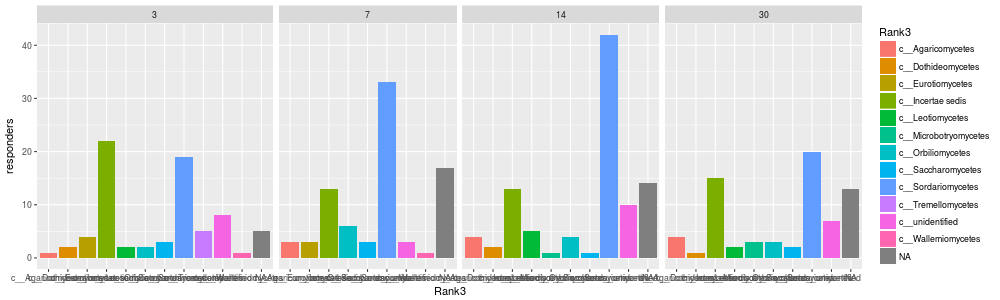

In [56]:
%%R -w 1000 -h 300

dcounts = d2 %>%
          group_by(Day,Rank3) %>%
          summarize(responders = sum(padj<= 0.10)) 

dcounts = filter(dcounts, responders !=0)          


p = ggplot(dcounts, aes(x = Rank3 , y = responders, fill = Rank3)) +
    facet_grid(. ~ Day, scales = "free_x", space = "free") +
    geom_bar(stat = "identity")

p

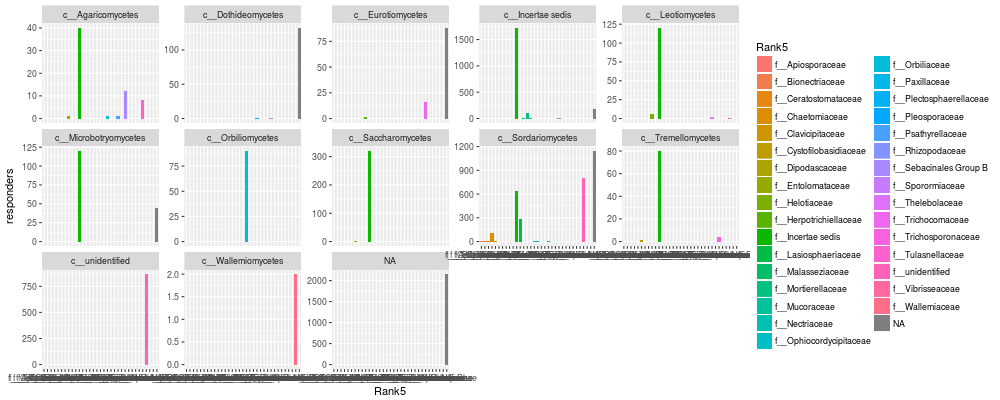

In [57]:
%%R -w 1000 -h 400

dcounts = d2 %>%
          filter(padj <= 0.10) %>%
          group_by(Rank5) %>%
          mutate(responders = sum(length(unique(OTU))))%>%
          ungroup()  

dcounts = filter(dcounts, responders > 0)          


p = ggplot(dcounts, aes(x = Rank5 , y = responders, fill = Rank5)) +
    facet_wrap(~ Rank3, scales = "free_y", ncol =5) +
    geom_bar(stat = "identity") 
p

In [58]:
%%R
head(d2) %>% as.data.frame

    tsne_1   tsne_2   OTU Day log2FoldChange            p         padj    Rank1
1 9.799208 -7.39636 OTU.1   7       3.043996 2.361174e-11 1.363578e-09 k__Fungi
2 9.799208 -7.39636 OTU.1  14       4.398721 6.749928e-18 3.855559e-16 k__Fungi
3 9.799208 -7.39636 OTU.1  30       2.424323 2.108905e-03 1.692353e-02 k__Fungi
4 9.799208 -7.39636 OTU.1   3       3.075985 3.179682e-08 1.987302e-06 k__Fungi
5 8.875103 -8.57920 OTU.2   7       2.958096 6.752304e-10 3.342390e-08 k__Fungi
6 8.875103 -8.57920 OTU.2  14       3.351991 6.641207e-08 1.129005e-06 k__Fungi
          Rank2              Rank3             Rank4             Rank5
1 p__Ascomycota  c__Incertae sedis o__Incertae sedis f__Incertae sedis
2 p__Ascomycota  c__Incertae sedis o__Incertae sedis f__Incertae sedis
3 p__Ascomycota  c__Incertae sedis o__Incertae sedis f__Incertae sedis
4 p__Ascomycota  c__Incertae sedis o__Incertae sedis f__Incertae sedis
5 p__Ascomycota c__Sordariomycetes    o__Sordariales   f__unidentified
6 p__Ascomycot

In [59]:
%%R -w 1000 -h 400

dcounts = d2 %>%
          group_by(Rank5) %>%
          filter(padj<=0.10, Rank3 == "Sordariomycetes") %>%
          mutate(responders = sum(length(unique(OTU))))%>%
          ungroup()  

dcounts = filter(dcounts, responders > 0)          


p = ggplot(dcounts, aes(x = Rank5 , y = responders, fill = Rank5)) +
    facet_wrap(~ Rank3, scales = "free_y", ncol =5) +
    geom_bar(stat = "identity") 
p

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error: Faceting variables must have at least one value

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y) :
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:1

RRuntimeError: Error: Faceting variables must have at least one value


In [ ]:
%%R
d3 = filter(d2, padj <=0.10)
d3$tsne_1 = asNumeric(d3$tsne_1)
d3$tsne_2 = asNumeric(d3$tsne_2)
d3 = filter(d3, tsne_1 > 19)
d3 = filter(d3, tsne_2 > 7)
d3 = filter(d3, tsne_2 <13)

In [ ]:
%%R
length(d3$OTU)

In [ ]:
%%R -w 600 -h 600

my_palette <- colorRampPalette(c("red", "yellow", "green"))(n =299)


asNumeric = function(x) { as.numeric(as.character(x)) }
p = ggplot(d3, aes(x = asNumeric(tsne_1), y = asNumeric(tsne_2)))+
    geom_point(aes(fill = padj, color = padj, alpha = 0.85), pch = 21) +
    guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    scale_fill_gradient(low="red",high="yellow") + scale_colour_gradient(low="red",high="yellow") +
    guides(fill=FALSE)


p     

In [ ]:
%%R
OTUs = d3$OTU 

In [ ]:
%%R
counts = filter(d, OTU %in% OTUs)

In [ ]:
%%R
head(dcounts)

In [ ]:
%%R

dcounts = d3 %>%
          group_by(Day,Rank6) %>%
          summarize(responders = sum(padj<= 0.10))

p = ggplot(dcounts, aes(x = Rank6 , y = responders, fill = Rank6)) +
    facet_grid(. ~ Day, scales = "free_x", space = "free") +
    geom_bar(stat = "identity")


#px = ggplot(d, aes(x = factor(Day), y = responders, fill = RNA_DNA))

#px = px + facet_grid(. ~ Day, scales = "free_x", space = "free")

#px = px + geom_bar(stat = "identity", position = "dodge")

    #geom_point(aes(fill = padj, color = padj, alpha = 0.85), pch = 21) +
    #uides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) +
    #scale_fill_gradient(low="red",high="yellow") + scale_colour_gradient(low="red",high="yellow") +
    #guides(fill=FALSE)
p

In [ ]:
%%R
head(d3)

###Blasting vs. Living Tree Project for Responders

In [ ]:
%%R
q = arrange(resp, padj)
OTU = unique(q$OTU)
length(OTU)

In [ ]:
%%R
head(OTU, n = 10)

In [ ]:
from Bio.Blast.Applications import NcbiblastnCommandline as blast

In [ ]:
from cogent import LoadSeqs, DNA

In [ ]:
%%bash
formatdb -i /home/chantal/FungalSIP/data/tmp/db/its_12_11_otus/rep_set/97_otus.fasta -p F

In [ ]:
OTU_ids = ["OTU.98", "OTU.49", "OTU.53", "OTU.90", "OTU.279", "OTU.6893", "OTU.460", "OTU.6893"]
seqs = LoadSeqs("/home/chantal/FungalSIP/data/otusn.fasta", moltype=DNA, aligned=False)
seqs = seqs.takeSeqs(OTU_ids).toFasta()
print seqs

In [ ]:
my_file = open("seqs.fasta", "w")
my_file.write(seqs)
my_file.close()

In [ ]:
cline = blast(query = "seqs.fasta",
              db = "/home/chantal/FungalSIP/data/tmp/db/its_12_11_otus/rep_set/97_otus.fasta",
              outfmt = 6,
              out = "otusn_silvaRefNR115.m6",
              num_threads = 5)
print cline
cline()

In [ ]:
!head -n1 otusn_silvaRefNR115.m6
!wc -l otusn_silvaRefNR115.m6
! grep -c "OTU.279" otusn_silvaRefNR115.m6

In [ ]:
from IPython.display import Image
import pandas.rpy.common as com

In [ ]:
%%R
library(data.table)
library(dplyr)

In [ ]:
%%R
blastout_dt = fread("otusn_silvaRefNR115.m6")
blastout_df = tbl_df(blastout_dt)
colnames(blastout_df) = c("OTU",
                        "acc",
                        "pid",
                        "aln.length",
                        "mismatches",
                        "gapOpenCount",
                        "qstart",
                        "qend",
                        "sstart",
                        "send",
                        "e.value",
                        "bit.score")

top_hits_df_LTP = blastout_df %>% 
                          group_by(OTU) %>% 
                          mutate(Rank = rank(desc(bit.score), ties.method = "min")) #%>% 
                          #filter(pid > 97.0) %>%
                          #filter(e.value < 5.0e-180) %>%
                          #filter(acc %in% c('AM286414', 'AB428568', 'EU877263', 'EF575565', 'EF494193', 'X82449'))

In [ ]:
%%R
print(head(top_hits_df_LTP))
str(top_hits_df_LTP$OTU)

In [ ]:
! head data/tmp/db/its_12_11_otus/taxonomy/otu_taxonomy.txt

In [ ]:
%%R
dt = fread("data/tmp/db/its_12_11_otus/taxonomy/97_otu_taxonomy.txt", sep = ";", header = FALSE)
dat1 <- data.frame(do.call(rbind, strsplit(as.vector(dt$V1), split = "\t")))
dt <- cbind(dat1, dt)
dt$V1 = NULL
colnames(dt) = c("acc","Kingdom","Phylum","Class","Order","Family","Genus", "Species")
ITS_seq_data = tbl_df(dt)
head(dt)

In [ ]:
%%R
joined_df = left_join(top_hits_df_LTP, ITS_seq_data)

In [ ]:
%%R
head(joined_df)

In [ ]:
%%R
joined_df = filter(joined_df, name != "NA")

In [ ]:
%%R
dim(joined_df)

In [ ]:
%%R
head(joined_df)

In [ ]:
df = com.load_data("joined_df")

In [ ]:
def get_latex(df):
    latex = ""
    prefix = r"\multirow{%s}{*}{%s}"%(len(df.index), df.OTU.iloc[0])
    for i, r in df[["Genus", "Species","pid","acc"]].iterrows():
        latex += " & " + " & ".join([str(i) for i in r.values]) + r" \\ "
    return prefix + latex + r"\midrule" + "\n"

In [ ]:
s = df.groupby("OTU").apply(get_latex)

table_framework = r"""
\documentclass[11pt]{article}
\usepackage{multirow, array, booktabs}
\begin{document}

\thispagestyle{empty}
 
\begin{table}[ht]
\caption{$^{13}$C RNA responders BLAST against Living Tree Project}
\begin{center}
\begin{tabular}{l>{\itshape}lrl}
    \toprule \\
    \textbf{OTU ID} & \textbf{Species Name} & \textbf{BLAST percent identity} & \textbf{accession} \\
    \midrule
    %s
    \bottomrule
\end{tabular}
\end{center}
\label{tab:multicol}
\end{table}
 
\end{document}"""%"".join(s.values)

with open("data/table.tex", "w") as out:
    out.write(table_framework)

In [ ]:
!latex -output-directory="data/tmp" data/tmp/table.tex >/dev/null 2>&1 && \
dvipng -o data/table.png data/tmp/table.dvi >/dev/null 2>&1
Image("data/table.png")